# Koda za projektno nalogo PR
## Tehnični pregledi motornih vozil v Sloveniji

### Skupina
* Leon Macur - 63180190
* Kevin Mohar - 63180209

### Podatki
podatki -> (OPSI: odprti podatki) https://podatki.gov.si/dataset/rezultati-tehnicnih-pregledov-motornih-vozil \
datoteke -> Porocilo o uspesnosti tp (2019, 2018, 2017, 2016, 2015) \
txt -> tp-2019 \
csv -> tp-(2018, 2017, 2016, 2015)

### Organizacija in branje podatkov:

In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import matplotlib.pyplot as plt
import operator
import re

def getDat(datoteka):
    dat = []
    i = 0
    with open(datoteka, "r", encoding="utf8") as datRead:
        for datLine in datRead.readlines():
            dat += [[]]
            for beseda in datLine.split(";"):
                dat[i].append(beseda.strip("\"\n"))
            i += 1
    datRead.close()
    return dat

# dats = [2019, 2018, 2017, 2016, 2015]
dats = [getDat('podatki/Porocilo_o_uspesnosti_tp_2019.txt'), getDat('podatki/Porocilo_o_uspesnosti_tp_2018.csv'),
        getDat('podatki/Porocilo_o_uspesnosti_tp_2017.csv'), getDat('podatki/Porocilo_o_uspesnosti_tp_2016.csv'), 
        getDat('podatki/Porocilo_o_uspesnosti_tp_2015.csv')]

# dat[0] <- header
# dat[#>0] <- vrstica (podatki) o vozilu

#### Vpr1:
Katera znamka vozila je najmanj zanesljiva pri opravljanju tehničnega pregleda, kjer je bilo vozilo prvič registrano vsaj 25 let nazaj.

['TAM', 'RENAULT', 'VOLKSWAGEN', 'OPEL', 'CITROEN', 'FORD', 'MERCEDESBENZ', 'ZASTAVA', 'BMW', 'FIAT']
[0.868421052631579, 0.8825278810408922, 0.9080200096821043, 0.9083689676237019, 0.9134241245136187, 0.9240506329113924, 0.927062706270627, 0.93359375, 0.9504830917874396, 0.9582494969818913]


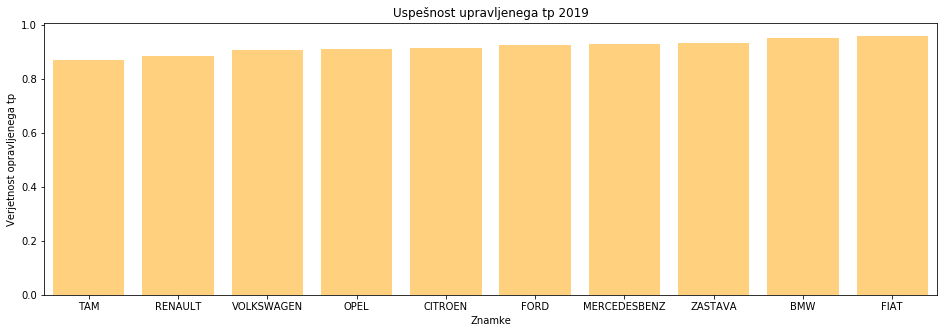

['TAM', 'RENAULT', 'OPEL', 'AUDI', 'VOLKSWAGEN', 'CITROEN', 'FORD', 'MERCEDESBENZ', 'ZASTAVA', 'BMW']
[0.8763636363636363, 0.8820259419394688, 0.8986828774062816, 0.899090909090909, 0.9015043996593812, 0.9185639229422067, 0.9213583556747096, 0.9217282404508453, 0.9254794520547945, 0.9520426287744227]


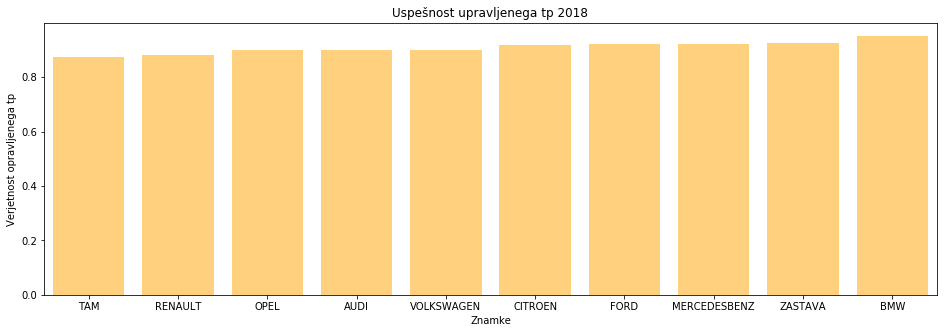

['TAM', 'RENAULT', 'VOLKSWAGEN', 'AUDI', 'CITROEN', 'OPEL', 'FORD', 'MERCEDESBENZ', 'ZASTAVA', 'SUZUKI']
[0.8498376623376623, 0.8693957115009746, 0.8885114642727162, 0.8920367534456355, 0.8959580838323353, 0.8974576271186441, 0.8980509745127436, 0.9151108518086347, 0.9298531810766721, 0.9380530973451328]


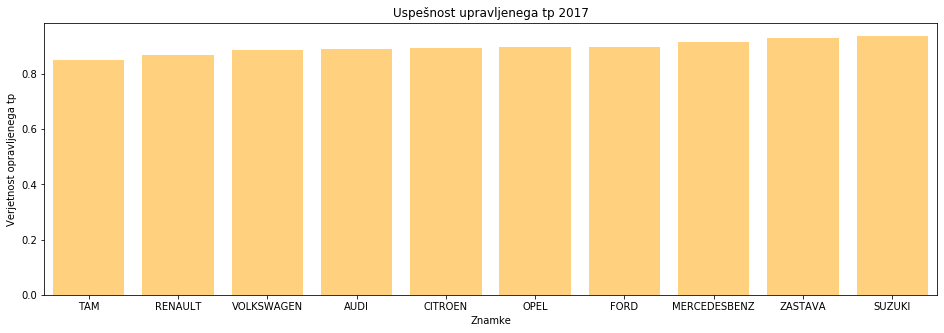

['TAM', 'RENAULT', 'CITROEN', 'OPEL', 'VOLKSWAGEN', 'AUDI', 'FORD', 'SUZUKI', 'MERCEDESBENZ', 'ZASTAVA']
[0.8542449286250939, 0.8759464181712289, 0.8852760736196319, 0.8915703602991163, 0.8926612151951144, 0.8974691758598313, 0.9027511196417146, 0.9232158988256549, 0.9248826291079812, 0.9262295081967213]


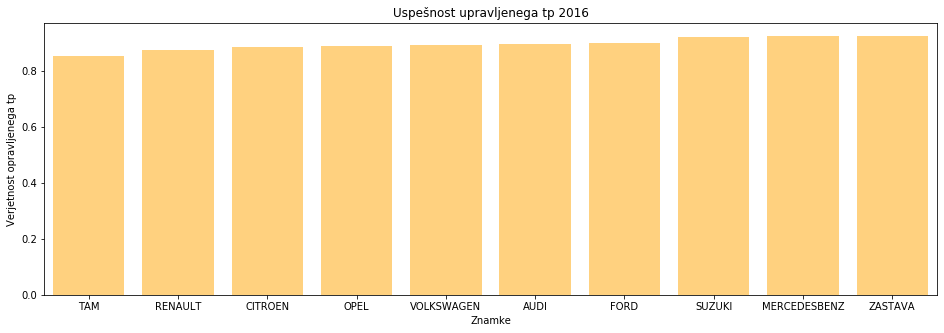

['RENAULT', 'PEUGEOT', 'TAM', 'ŠKODA', 'FORD', 'OPEL', 'UNIS', 'VOLKSWAGEN', 'CITROEN', 'AUDI']
[0.8650829907111314, 0.8668478260869565, 0.8716875871687587, 0.8769953051643192, 0.8913721413721414, 0.8920564627733186, 0.8931777378815081, 0.8933617701946148, 0.8954214360041624, 0.8980747451868629]


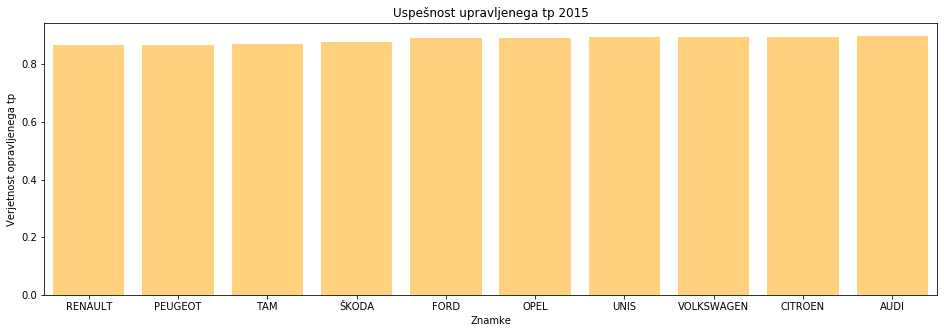

In [2]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][14] <- Datum prve registracije
# dat[#>0][21] <- Status tehničnega pregleda

datum = datetime.strptime("01.01.1996", "%d.%m.%Y").date()

for range_dat in range(5):
    datum.replace(year = datum.year - 1)

    dictVoz = {}
    for vozilo in dats[range_dat]:
        try:
            if datetime.strptime(vozilo[14], "%d.%m.%Y").date() < datum:
                if vozilo[21] != "":
                    # Ali je vozilo že zapisano
                    if re.sub("[ .-]", "", vozilo[0]) not in dictVoz:
                        dictVoz[re.sub("[ .-]", "", vozilo[0])] = [0, 0]

                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0] + 1, 
                                                                   dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
                    else:
                        dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0], 
                                                                   dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
        except:
            pass

    # Izberemo tiste znamke vozil, ki imajo več kot 1000 opravljanj tp. Nato pa jim zračunamo verjetnost opravljenega tp.
    dictVoz = {key : value[0] / value[1] for key, value in dictVoz.items() if value[1] >= 1000}

    # Sortiramo znamke po verjetnostih (padajoče).
    dictVoz = {key : value for key, value in sorted(dictVoz.items(), key = lambda x: x[1])}

    # Shranimo prvih 10 znamk.
    znamke = []
    pr = []
    i = 1
    for k, v in dictVoz.items():
        znamke.append(k)
        pr.append(v)
        i += 1
        if i > 10: break

    print(znamke)
    print(pr)

    plt.figure(figsize=(16, 5))
    plt.bar(range(len(pr)), pr, width=0.8, color="orange", alpha=0.5)
    plt.xlim(-0.5, len(znamke)-0.5)
    plt.xticks(range(len(znamke)))
    plt.gca().set_xticklabels(znamke)
    plt.title("Uspešnost upravljenega tp " + str(2019-range_dat))
    plt.xlabel("Znamke")
    plt.ylabel("Verjetnost opravljenega tp")
    plt.show()

#### Vpr2:
Katera znamka vozila je najmanj zanesljiva pri opravljanju tehničnega pregleda (vse starosti).

['DAEWOO', 'TAM', 'CHRYSLER', 'IVECO', 'LANCIA', 'CHEVROLET', 'MAN', 'RENAULT', 'ALFAROMEO', 'LANDROVER']
[0.8620289855072464, 0.8647166361974405, 0.8705103969754253, 0.874427798585102, 0.8874862788144896, 0.9010989010989011, 0.903421781470562, 0.9043730775457341, 0.9061066513761468, 0.9217067108533554]


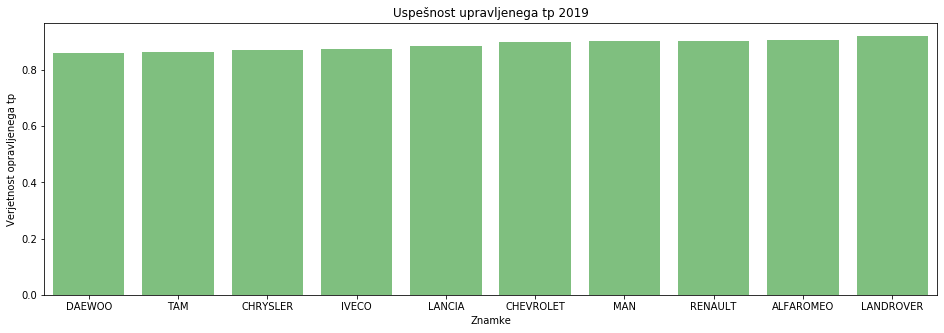

['DAEWOO', 'IVECO', 'TAM', 'LANCIA', 'CHRYSLER', 'ALFAROMEO', 'MAN', 'RENAULT', 'CHEVROLET', 'FIAT']
[0.8675271739130435, 0.8704781704781704, 0.8739352640545145, 0.8809045226130653, 0.8816725978647687, 0.8972537231862276, 0.8980381320806853, 0.9017373895897467, 0.9057293437606256, 0.9204091187380704]


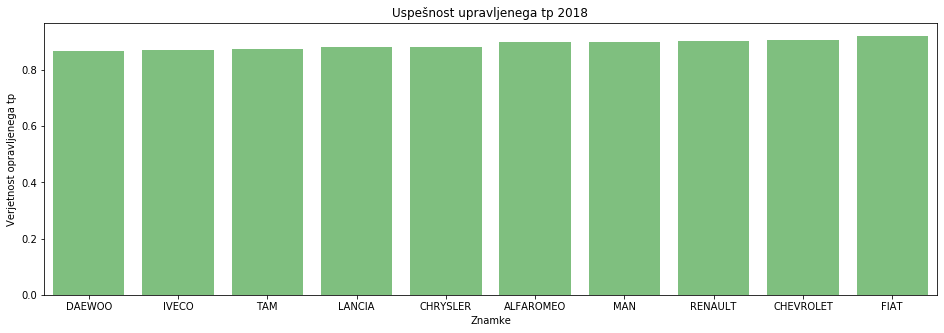

['TAM', 'DAEWOO', 'ROVER', 'IVECO', 'CHRYSLER', 'RENAULT', 'LANCIA', 'MAN', 'ALFAROMEO', 'FIAT']
[0.8473282442748091, 0.8573928258967629, 0.8667255075022066, 0.8719180944421229, 0.8807890222984562, 0.898375631506619, 0.8994280266920877, 0.9000296941502524, 0.9016184529119409, 0.9137041180929008]


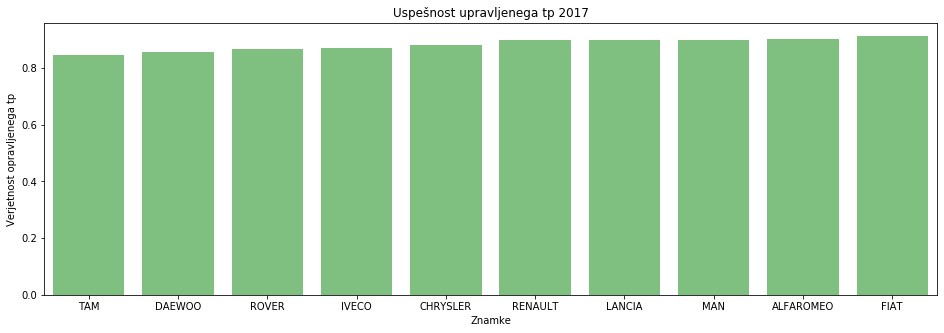

['TAM', 'DAEWOO', 'IVECO', 'ROVER', 'CHRYSLER', 'MAN', 'LANCIA', 'RENAULT', 'ALFAROMEO', 'FIAT']
[0.8565340909090909, 0.8704103671706264, 0.8783319002579536, 0.8791899441340782, 0.8929121725731896, 0.89631480324797, 0.9013248058474189, 0.9029534180399046, 0.9087736789631107, 0.9185765566754107]


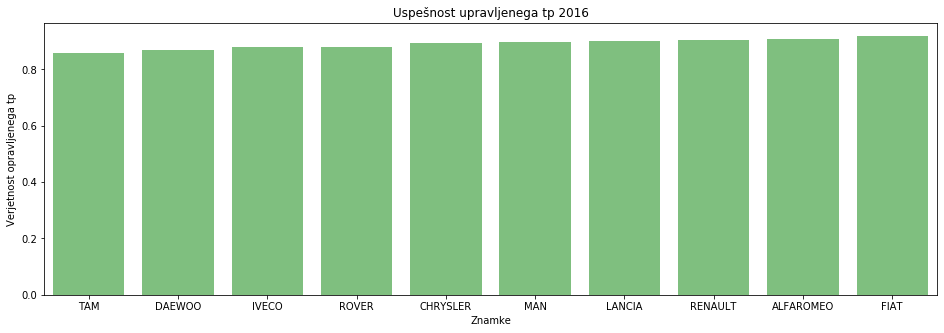

['DAEWOO', 'IVECO', 'TAM', 'ROVER', 'CHRYSLER', 'UNIS', 'MAN', 'LANCIA', 'RENAULT', 'ALFAROMEO']
[0.8666349130745415, 0.8725230475786797, 0.8730998017184401, 0.8737580362361193, 0.8885564697083022, 0.8925693822739481, 0.8981641468682505, 0.900131406044678, 0.9029434248854558, 0.9056022740731967]


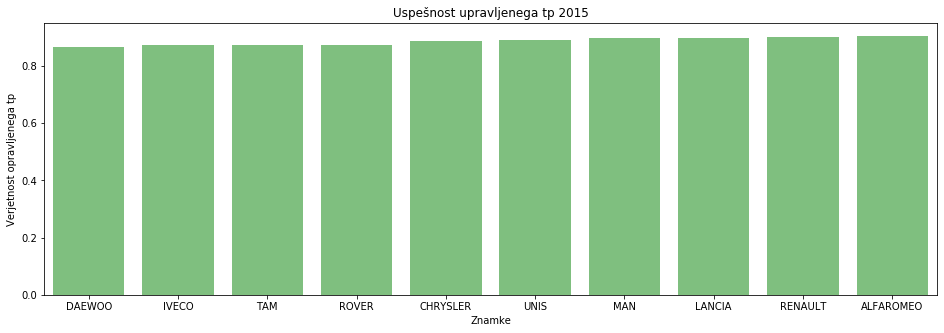

In [3]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    dictVoz = {}
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "":
                # Ali je vozilo že zapisano
                if re.sub("[ .-]", "", vozilo[0]) not in dictVoz:
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [0, 0]

                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0] + 1, 
                                                               dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
                else:
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0], 
                                                               dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
        except:
            pass

    # Izberemo tiste znamke vozil, ki imajo več kot 1000 opravljanj tp. Nato pa jim zračunamo verjetnost opravljenega tp.
    dictVoz = {key : value[0] / value[1] for key, value in dictVoz.items() if value[1] >= 1000}

    # Sortiramo znamke po verjetnostih (padajoče).
    dictVoz = {key : value for key, value in sorted(dictVoz.items(), key = lambda x: x[1])}

    # Shranimo prvih 10 znamk.
    znamke = []
    pr = []
    i = 1
    for k, v in dictVoz.items():
        znamke.append(k)
        pr.append(v)
        i += 1
        if i > 10: break

    print(znamke)
    print(pr)

    plt.figure(figsize=(16, 5))
    plt.bar(range(len(pr)), pr, width=0.8, color="green", alpha=0.5)
    plt.xlim(-0.5, len(znamke)-0.5)
    plt.xticks(range(len(znamke)))
    plt.gca().set_xticklabels(znamke)
    plt.title("Uspešnost upravljenega tp " + str(2019-range_dat))
    plt.xlabel("Znamke")
    plt.ylabel("Verjetnost opravljenega tp")
    plt.show()

#### Vpr3:
Katera znamka vozila je najmanj zanesljiva pri opravljanju tehničnega pregleda (vse starosti / vsa leta).

['SCHWARZMULLER', 'AIXAM', 'TAM', 'DAEWOO', 'ROVER', 'IVECO', 'PROTON', 'CHRYSLER', 'MEILLER', 'VOZILAGORICA']
[0.8384043272481406, 0.8599871547848427, 0.8630558547468842, 0.8653021712073019, 0.8729862642021367, 0.873509306972342, 0.8829389788293898, 0.8835032592344978, 0.8871627146361406, 0.8877049180327868]


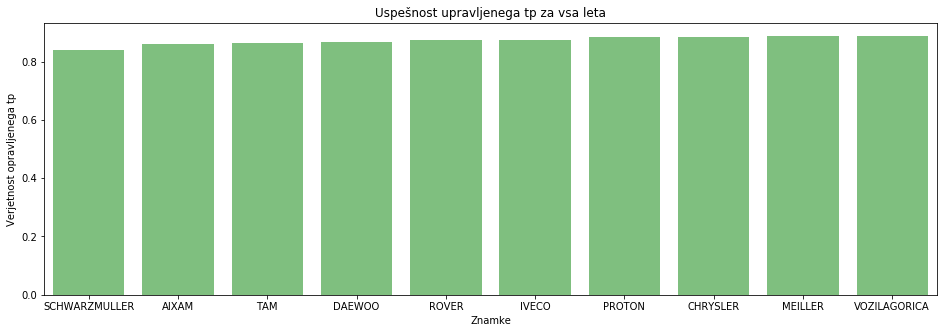

In [4]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][21] <- Status tehničnega pregleda

dictVoz = {}
for range_dat in range(5):
    for vozilo in dats[range_dat]:
        try:
            if vozilo[21] != "":
                # Ali je vozilo že zapisano
                if re.sub("[ .-]", "", vozilo[0]) not in dictVoz:
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [0, 0]

                # Ali je vozilo opravil tp
                if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0] + 1, 
                                                               dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
                else:
                    dictVoz[re.sub("[ .-]", "", vozilo[0])] = [dictVoz[re.sub("[ .-]", "", vozilo[0])][0], 
                                                               dictVoz[re.sub("[ .-]", "", vozilo[0])][1] + 1]
        except:
            pass

# Izberemo tiste znamke vozil, ki imajo več kot 1000 opravljanj tp. Nato pa jim zračunamo verjetnost opravljenega tp.
dictVoz = {key : value[0] / value[1] for key, value in dictVoz.items() if value[1] >= 1000}

# Sortiramo znamke po verjetnostih (padajoče).
dictVoz = {key : value for key, value in sorted(dictVoz.items(), key = lambda x: x[1])}

# Shranimo prvih 10 znamk.
znamke = []
pr = []
i = 1
for k, v in dictVoz.items():
    znamke.append(k)
    pr.append(v)
    i += 1
    if i > 10: break

print(znamke)
print(pr)

plt.figure(figsize=(16, 5))
plt.bar(range(len(pr)), pr, width=0.8, color="green", alpha=0.5)
plt.xlim(-0.5, len(znamke)-0.5)
plt.xticks(range(len(znamke)))
plt.gca().set_xticklabels(znamke)
plt.title("Uspešnost upravljenega tp za vsa leta")
plt.xlabel("Znamke")
plt.ylabel("Verjetnost opravljenega tp")
plt.show()

#### Vpr4:
Uspešnost opravljenega tehničnega pregleda izbranih znmak skozi leta.

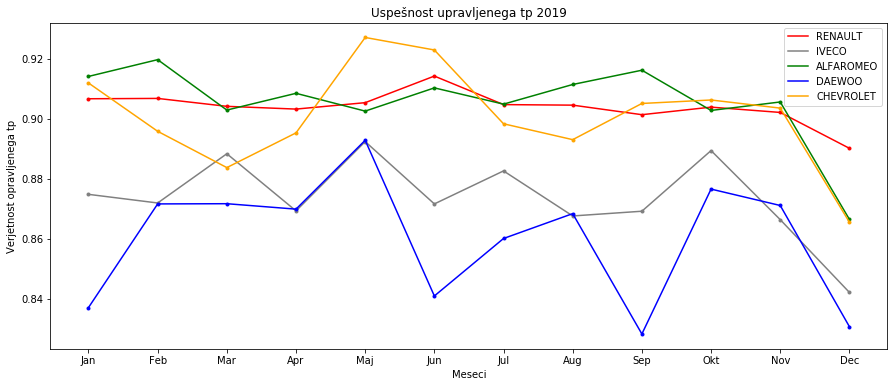

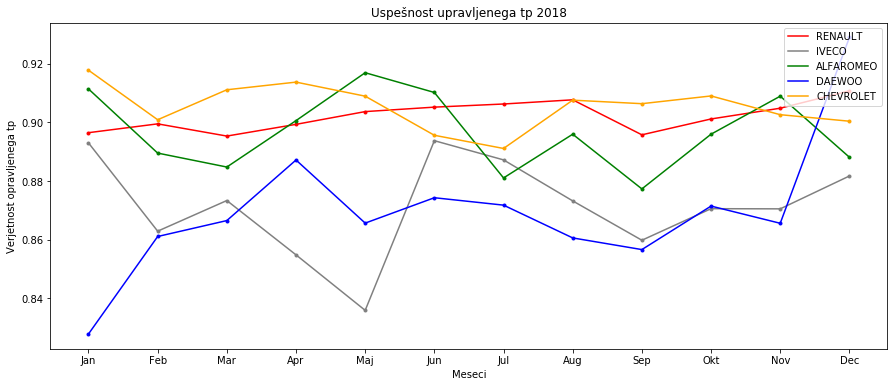

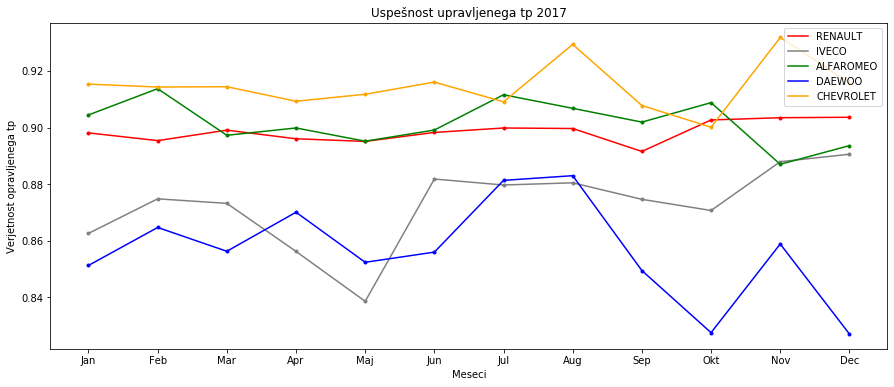

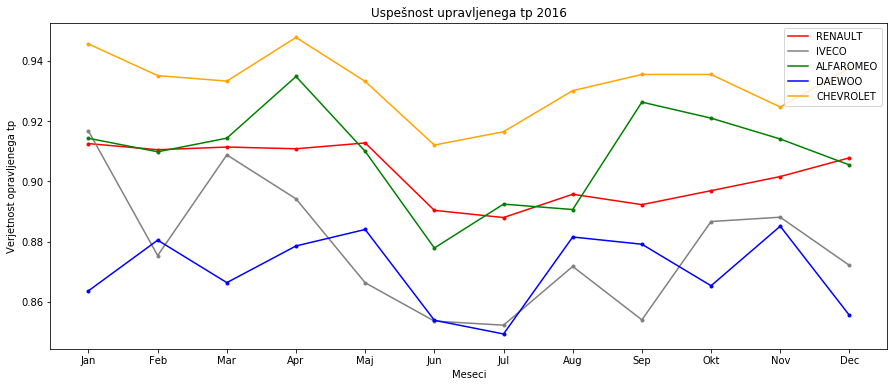

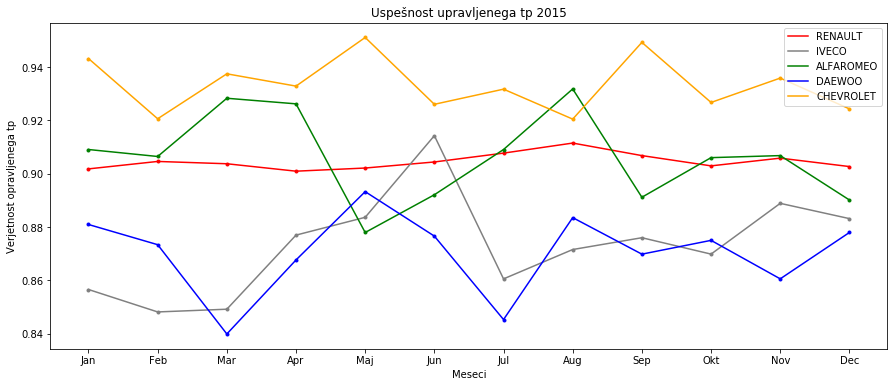

In [5]:
# dat[#>0][0] <- Znamka vozila
# dat[#>0][19] <- Datum pregleda
# dat[#>0][21] <- Status tehničnega pregleda

for range_dat in range(5):
    dictZnamke = {}
    for i in range (1,13):
        dictZnamke[i] = {"1":[0, 0], "2":[0, 0], "3":[0, 0], "4":[0, 0], "5":[0, 0]}

    for vozilo in dats[range_dat]:
            try:
                if range_dat == 0 or range_dat == 4:
                    datum = datetime.strptime(vozilo[19], "%m/%d/%Y").date().month
                else:
                    datum = datetime.strptime(re.sub("[ ]", "", vozilo[19]), "%d.%m.%Y").date().month
                if re.sub("[ .-]", "", vozilo[0]) == "RENAULT":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictZnamke[datum]["1"][0] = dictZnamke[datum]["1"][0] + 1
                        dictZnamke[datum]["1"][1] = dictZnamke[datum]["1"][1] + 1
                    else:
                        dictZnamke[datum]["1"][1] = dictZnamke[datum]["1"][1] + 1
                elif re.sub("[ .-]", "", vozilo[0]) == "IVECO":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictZnamke[datum]["2"][0] = dictZnamke[datum]["2"][0] + 1
                        dictZnamke[datum]["2"][1] = dictZnamke[datum]["2"][1] + 1
                    else:
                        dictZnamke[datum]["2"][1] = dictZnamke[datum]["2"][1] + 1
                elif re.sub("[ .-]", "", vozilo[0]) == "ALFAROMEO":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictZnamke[datum]["3"][0] = dictZnamke[datum]["3"][0] + 1
                        dictZnamke[datum]["3"][1] = dictZnamke[datum]["3"][1] + 1
                    else:
                        dictZnamke[datum]["3"][1] = dictZnamke[datum]["3"][1] + 1
                elif re.sub("[ .-]", "", vozilo[0]) == "DAEWOO":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictZnamke[datum]["4"][0] = dictZnamke[datum]["4"][0] + 1
                        dictZnamke[datum]["4"][1] = dictZnamke[datum]["4"][1] + 1
                    else:
                        dictZnamke[datum]["4"][1] = dictZnamke[datum]["4"][1] + 1
                elif re.sub("[ .-]", "", vozilo[0]) == "CHEVROLET":
                    # Ali je vozilo opravil tp
                    if vozilo[21] == "brezhiben" or vozilo[21] == "pogojno brezhiben":
                        dictZnamke[datum]["5"][0] = dictZnamke[datum]["5"][0] + 1
                        dictZnamke[datum]["5"][1] = dictZnamke[datum]["5"][1] + 1
                    else:
                        dictZnamke[datum]["5"][1] = dictZnamke[datum]["5"][1] + 1
            except:
                pass


    # Izračunamo verjetnosti upravljenega tp (po mesecih)
    dictZnamke = {key : [v["1"][0] / v["1"][1], v["2"][0] / v["2"][1], v["3"][0] / v["3"][1], 
                         v["4"][0] / v["4"][1], v["5"][0] / v["5"][1]] for key, v in dictZnamke.items()}

    meseci = ["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dec"]

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.plot(meseci, [v[0] for k, v in dictZnamke.items()], "k.", color="red")
    ax.plot(meseci, [v[0] for k, v in dictZnamke.items()], color="red", label="RENAULT")

    ax.plot(meseci, [v[1] for k, v in dictZnamke.items()], "k.", color="gray")
    ax.plot(meseci, [v[1] for k, v in dictZnamke.items()], color="gray", label="IVECO")

    ax.plot(meseci, [v[2] for k, v in dictZnamke.items()], "k.", color="green")
    ax.plot(meseci, [v[2] for k, v in dictZnamke.items()], color="green", label="ALFAROMEO")

    ax.plot(meseci, [v[3] for k, v in dictZnamke.items()], "k.", color="blue")
    ax.plot(meseci, [v[3] for k, v in dictZnamke.items()], color="blue", label="DAEWOO")

    ax.plot(meseci, [v[4] for k, v in dictZnamke.items()], "k.", color="orange")
    ax.plot(meseci, [v[4] for k, v in dictZnamke.items()], color="orange", label="CHEVROLET")

    ax.set_title("Uspešnost upravljenega tp " + str(2019-range_dat))
    ax.set_xlabel("Meseci")
    ax.set_ylabel("Verjetnost opravljenega tp")
    plt.legend(loc="upper right")
    plt.show()